In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from common import helper as h

/u/44/korhonj19/unix/rl_course/venv/lib/python3.8/site-packages/glfw/__init__.py:906: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


<AxesSubplot:>

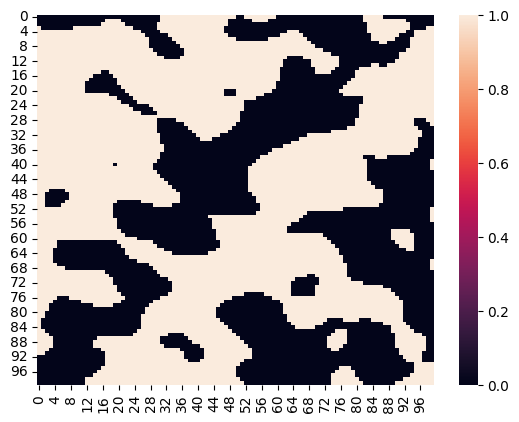

In [22]:
# load the Q-value array
import pickle


env_name = "CartPole-v0"

work_dir = Path().cwd()/'results'/f'{env_name}'
data = h.load_object(work_dir/'model/rbf.pkl') # load q_table 

Q = data['q']
featurizer = data['featurizer']

q1, q2 = Q[0], Q[1]

n_samples = 100


#self.featurizer.fit(self.scaler.transform(samples))
# scaler = StandardScaler().fit(samples) 



x_vec = np.linspace(-5,5,n_samples)
theta_vec = np.linspace(-np.pi, np.pi,n_samples)

mat = np.zeros((n_samples, n_samples))


for i,x in enumerate(x_vec):
    for j,theta in enumerate(theta_vec):
        state = np.array([x, 0, theta, 0]).reshape(1,-1)
        feature = featurizer.transform(state)
        mat[i,j] = np.argmax([q1.predict(feature), q2.predict(feature)])



sns.heatmap(mat)


In [10]:
data

{'q': [SGDRegressor(learning_rate='constant', max_iter=500),
  SGDRegressor(learning_rate='constant', max_iter=500)],
 'featurizer': FeatureUnion(transformer_list=[('rbf1', RBFSampler(gamma=5.0)),
                                ('rbf2', RBFSampler(gamma=2.0, n_components=80)),
                                ('rbf3', RBFSampler(n_components=50))])}

<AxesSubplot:>

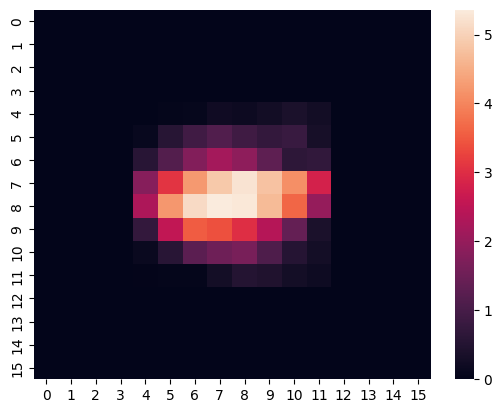

In [3]:
# TODO: Task 1.2 Plot the heatmap of the value function
########## Your code begins here. ##########
# Calculate the value function
#values = np.zeros(q_table.shape[:-1]) 
values = np.mean(np.max(q_table,axis=(4)) , axis=(1,3))
# Plot the heatmap
sns.heatmap(values)
########## Your code ends here. ##########

In [10]:
values

array([[50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50.],
       [50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50.],
       [50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50.],
       [50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50.],
       [50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50.],
       [50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50.],
       [50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50.],
       [50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50.],
       [50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50.],
       [50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50.],
       [50., 50., 50., 50., 50

In [ ]:
# save value 
h.save_object({'value': values, 'axis': q_axis},
                work_dir/"value.pkl")